# Rainfall Weather Forecasting

# Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. 


Here, predict two things:
 
1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


# Dataset Description:

Number of columns: 23

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


Dataset Link-  

https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv


# EXPLORATION OF DATASET:

In [1]:
#Importing necessary libraries for analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Downloading the raw data and loading into dataframe with the help of pandas library
df=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv")

In [3]:
#For viewing the first 5 columns in given dataset
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#To know about the no of rows and columns in the dataset
df.shape

(8425, 23)

In [5]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
cat_col = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",cat_col)
print("\nThe count of categoricdal columns are:",len(cat_col))

Categorical columns are: Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

The count of categoricdal columns are: 7


In [7]:
num_col = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns are:",num_col)
print("\nThe count of Numerical Columns are",len(num_col))

Numerical columns are: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

The count of Numerical Columns are 16


In [8]:
below_17=[]
for i in df.columns:
    print("Unique Value count of",i,"column:",len(df[i].unique()))
    if (len(df[i].unique())<18):
        below_17.append(i)

len(below_17)

Unique Value count of Date column: 3004
Unique Value count of Location column: 12
Unique Value count of MinTemp column: 286
Unique Value count of MaxTemp column: 332
Unique Value count of Rainfall column: 251
Unique Value count of Evaporation column: 117
Unique Value count of Sunshine column: 141
Unique Value count of WindGustDir column: 17
Unique Value count of WindGustSpeed column: 53
Unique Value count of WindDir9am column: 17
Unique Value count of WindDir3pm column: 17
Unique Value count of WindSpeed9am column: 35
Unique Value count of WindSpeed3pm column: 36
Unique Value count of Humidity9am column: 91
Unique Value count of Humidity3pm column: 95
Unique Value count of Pressure9am column: 385
Unique Value count of Pressure3pm column: 375
Unique Value count of Cloud9am column: 10
Unique Value count of Cloud3pm column: 10
Unique Value count of Temp9am column: 305
Unique Value count of Temp3pm column: 329
Unique Value count of RainToday column: 3
Unique Value count of RainTomorrow col

8

In [9]:
for i in below_17:
    print("Unique values of these columns:",i,"-",df[i].unique())

Unique values of these columns: Location - ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
Unique values of these columns: WindGustDir - ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Unique values of these columns: WindDir9am - ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Unique values of these columns: WindDir3pm - ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Unique values of these columns: Cloud9am - [ 8. nan  7.  1.  0.  5.  4.  2.  6.  3.]
Unique values of these columns: Cloud3pm - [nan  2.  8.  7.  1.  5.  4.  6.  3.  0.]
Unique values of these columns: RainToday - ['No' 'Yes' nan]
Unique values of these columns: RainTomorrow - ['No' 'Yes' nan]


Observation:

  There are 8425 rows and 23 columns in the dataset.In this 23 columns 9 columns has object dataype and 16 columns has
    int,float datatype.There are 8 columns which has unique values less than 17.
    
 we have tp design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.- problem 1 classification
 
we have to design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there. problem 2 regression problem

We can futher proceed for the futher analysis.

# Identifying the missing values:

In [10]:
#Finding the missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values],axis =1,keys =['Missing Values','% Missing data']))

               Missing Values  % Missing data
Sunshine                 3994       47.406528
Evaporation              3512       41.685460
Cloud3pm                 2455       29.139466
Cloud9am                 2421       28.735905
Pressure3pm              1312       15.572700
Pressure9am              1309       15.537092
WindGustDir               991       11.762611
WindGustSpeed             991       11.762611
WindDir9am                829        9.839763
WindDir3pm                308        3.655786
RainToday                 240        2.848665
Rainfall                  240        2.848665
RainTomorrow              239        2.836795
WindSpeed3pm              107        1.270030
Humidity3pm               102        1.210682
Temp3pm                    96        1.139466
WindSpeed9am               76        0.902077
MinTemp                    75        0.890208
MaxTemp                    60        0.712166
Humidity9am                59        0.700297
Temp9am                    56     

In [11]:
df_new=df.dropna()

In [12]:
df_new.shape

(3790, 23)

In [13]:
df.shape

(8425, 23)

Dropping all the null values causes huge data loss.So going with the imputation.For the numerical column imputing with mean and for the categorical column imputing with mode.

In [14]:
for i in cat_col:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [15]:
for i in num_col:
    df[i].fillna(df[i].mean(),inplace=True)

In [16]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

There is no missing values in the data set we can further process the dataset for the further analysis.

# Statistical Analysis of the dataset:

In [17]:
#To know more about the statistical description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8425.0,13.193305,5.379488,-2.0,9.300000,13.200000,17.300000,28.5
MaxTemp,8425.0,23.859976,6.114516,8.2,19.300000,23.300000,28.000000,45.5
Rainfall,8425.0,2.805913,10.309308,0.0,0.000000,0.000000,1.400000,371.0
Evaporation,8425.0,5.389395,3.852004,0.0,4.000000,5.389395,5.389395,145.0
Sunshine,8425.0,7.632205,2.825451,0.0,7.632205,7.632205,8.900000,13.9
WindGustSpeed,8425.0,40.174469,13.776101,7.0,31.000000,40.174469,48.000000,107.0
WindSpeed9am,8425.0,13.847646,10.128579,0.0,6.000000,13.000000,20.000000,63.0
WindSpeed3pm,8425.0,18.533662,9.704759,0.0,11.000000,19.000000,24.000000,83.0
Humidity9am,8425.0,67.822496,16.774231,10.0,56.000000,68.000000,80.000000,100.0
Humidity3pm,8425.0,51.249790,18.311894,6.0,39.000000,51.000000,63.000000,99.0


Observation:
    
1]The count of all the columns are equal so there is no missing values in the dataset.

2]The mean value is greater than median represents there is right skewed distribution of data.The columns which has this kind of distribution are [Rainfall	,WindSpeed9am,Humidity3pm,Cloud3pm,Temp3pm]

3]The mean value is lower than median represents there is left skewed distribution of data.The columns which has this kind of distribution are [WindSpeed3pm,Humidity9am,Temp9am]

4]The mean and median slightly difference has almost same values.The columns which has this kind of distribution are [MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,Pressure9am,Pressure3pm,Cloud9am]

5]The difference between 75% and max must be not drastic,If it has huge difference the column can have outliers present in them.The column which may have outlier present in  them are
[Rainfall,WindGustSpeed,WindSpeed3pm,Evaporation]

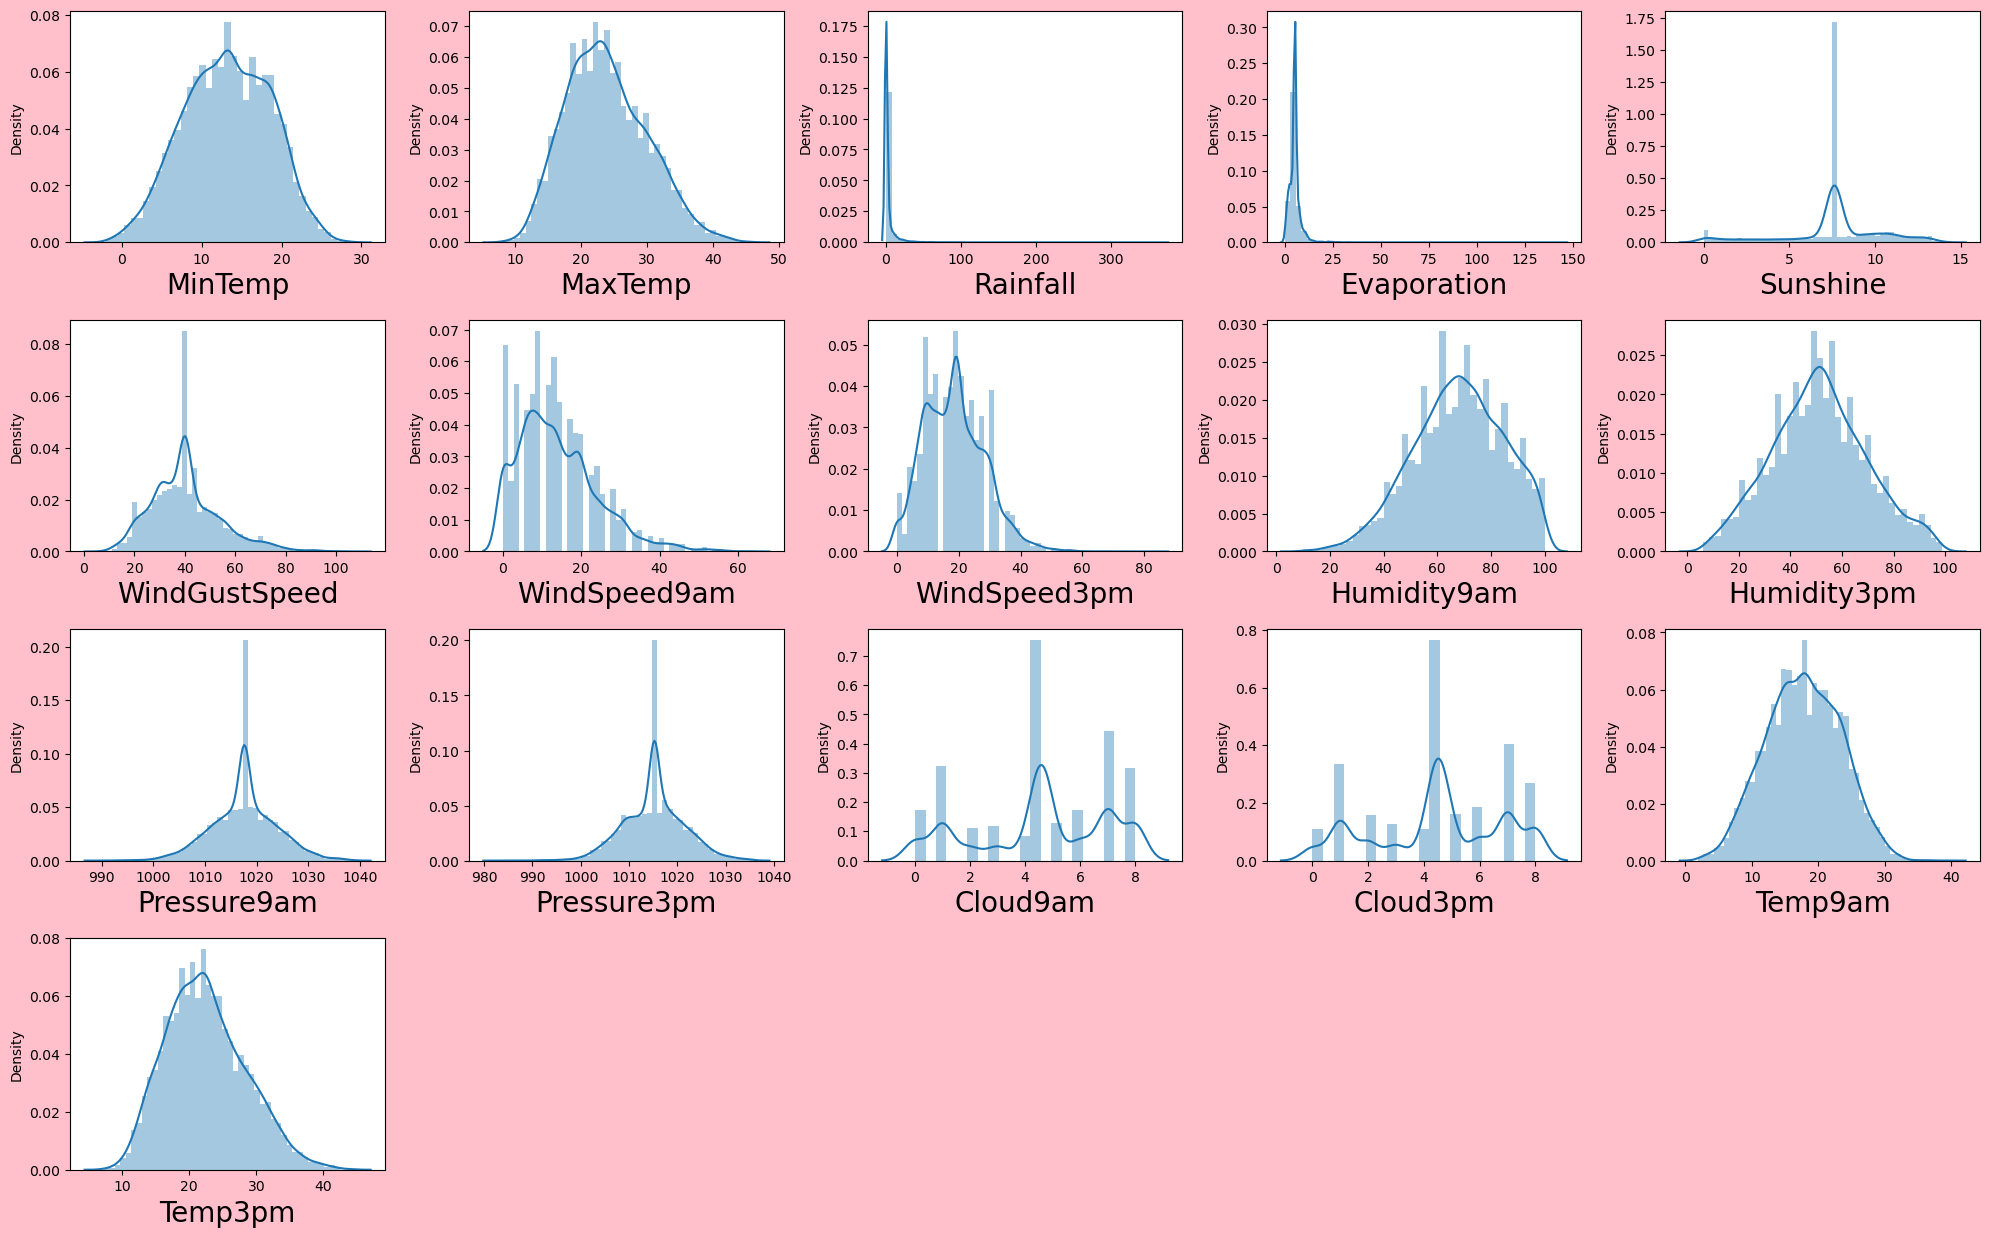

In [18]:
#To see the distribution among the columns:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in num_col:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From this visualisation we can see that slight slope in MinTemp,Rightskewed in MAxTemp,entire distribtion in rightskewed in rainfall,sunshine- some symmnetrical distribution.There many slopes in the cloud9am,cloud3pm, right symmentrical distribution in temp9am,temp3am.

# Visualisation: Univariate and bivariate analysis

RainTomorrow - Dependent feature

In [19]:
#Analysing the categorical column with Rain Tomorrow:
cat_col

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [20]:
#Splitting the date seperatily with day,month,year
df['Day']= df['Date'].str.split('-').str[2]
df['Month']= df['Date'].str.split('-').str[1]
df['Year'] = df['Date'].str.split('-').str[0]

In [21]:
#Droping the date column
df.drop(['Date'],inplace=True,axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

The Day,Month,Year in object dataype converting their datatypes into integer with pandas astype method.

In [23]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

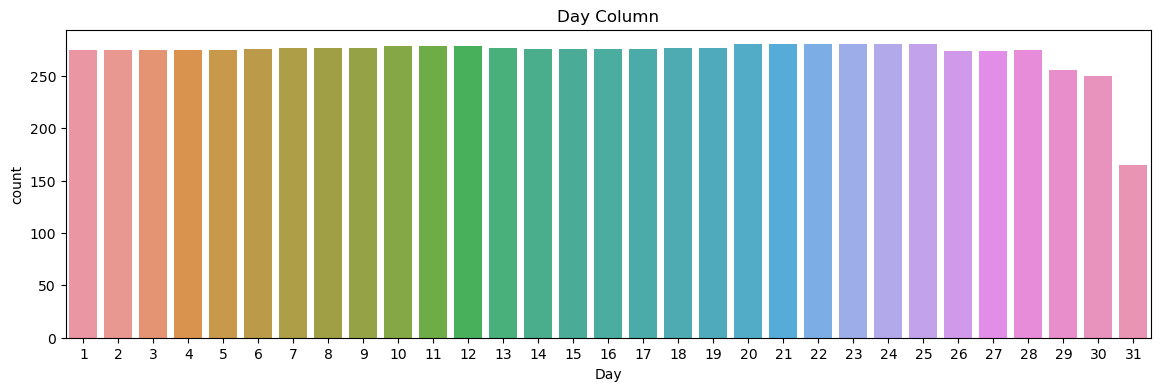

In [25]:
#Univariate analysis
plt.figure(figsize=(14,4))
sns.countplot(x="Day",data=df)
plt.title("Day Column")
plt.show()

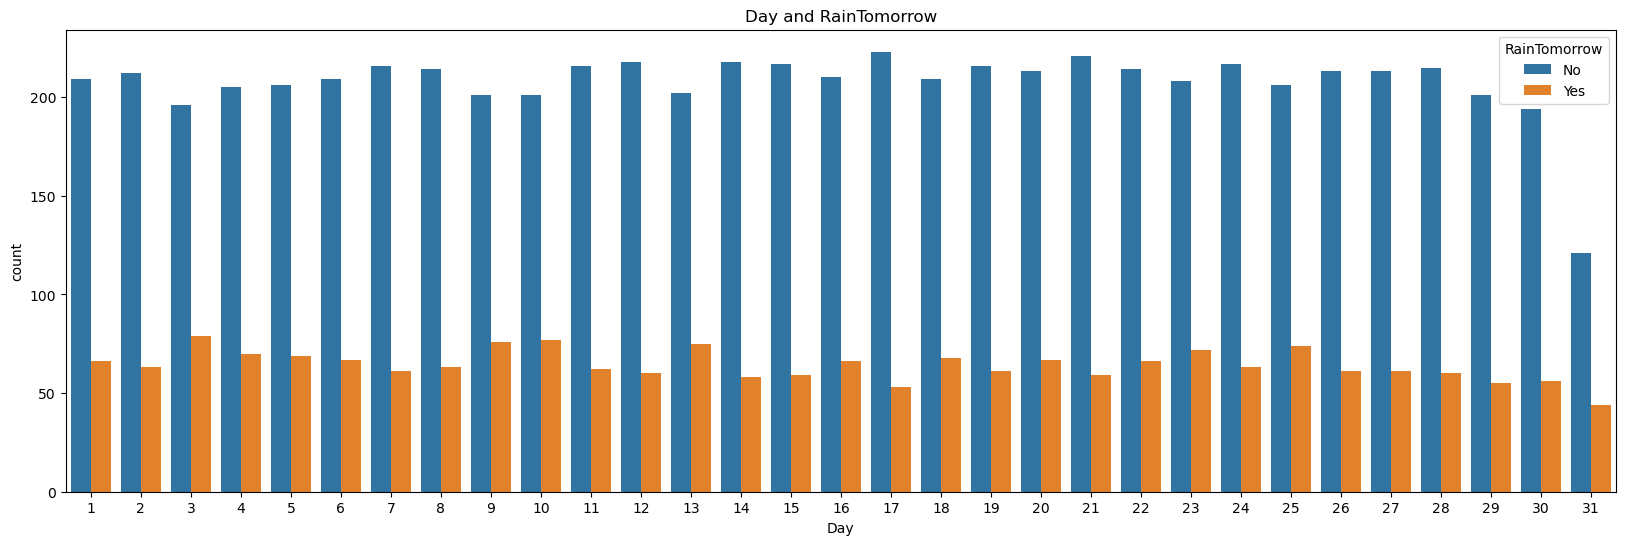

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(x="Day",hue="RainTomorrow",data=df)
plt.title("Day and RainTomorrow")
plt.show()

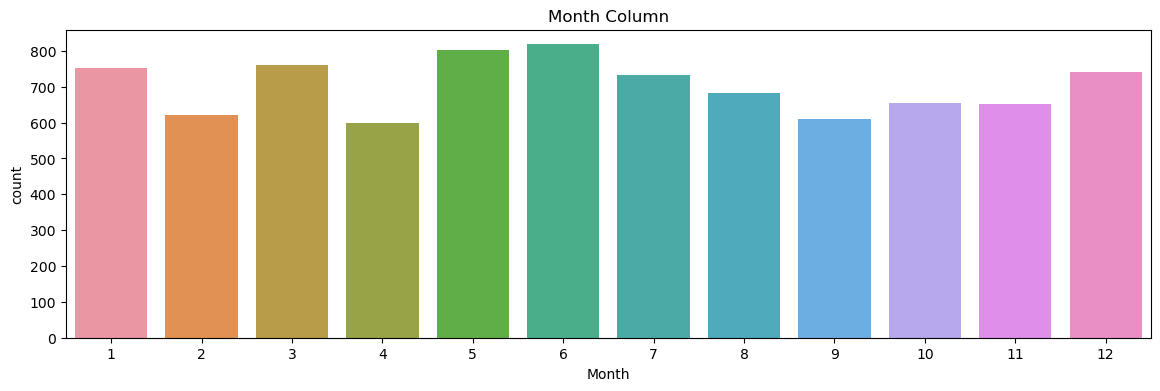

In [27]:
#Univariate analysis
plt.figure(figsize=(14,4))
sns.countplot(x="Month",data=df)
plt.title("Month Column")
plt.show()

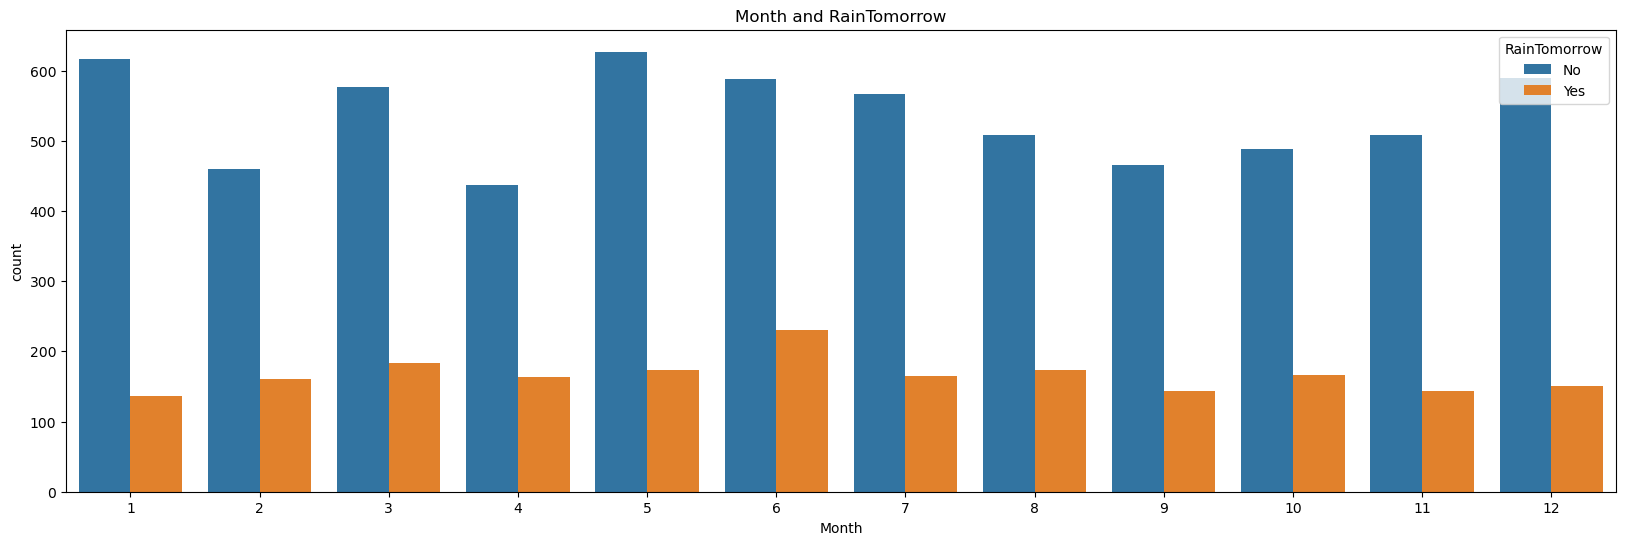

In [28]:
plt.figure(figsize=(20,6))
sns.countplot(x="Month",hue="RainTomorrow",data=df)
plt.title("Month and RainTomorrow")
plt.show()

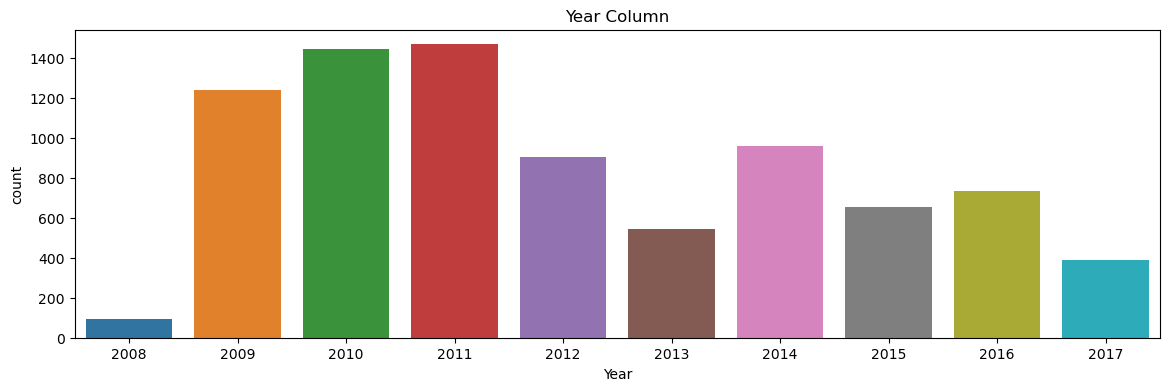

In [29]:
#Univariate analysis
plt.figure(figsize=(14,4))
sns.countplot(x="Year",data=df)
plt.title("Year Column")
plt.show()

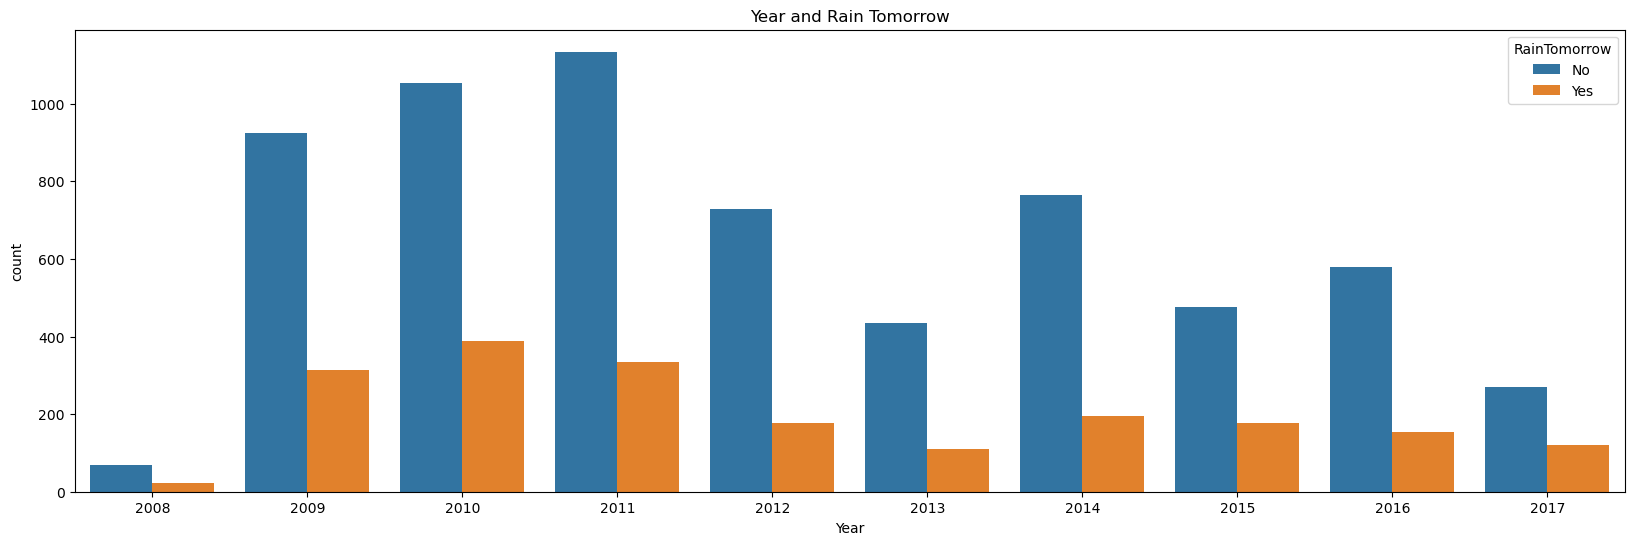

In [30]:
plt.figure(figsize=(20,6))
sns.countplot(x="Year",hue="RainTomorrow",data=df)
plt.title("Year and Rain Tomorrow")
plt.show()

From these visualization,We can see that relationship between the day,month,year with the rain tomorrow .
In the year 2010 there is lot of amount of rain recorded. and in 2008 least amount of raintomorrow has been recorded.
In the month 6 we can see there is raintomorrow large.Majority of recorded values in the raintomorrow NO.

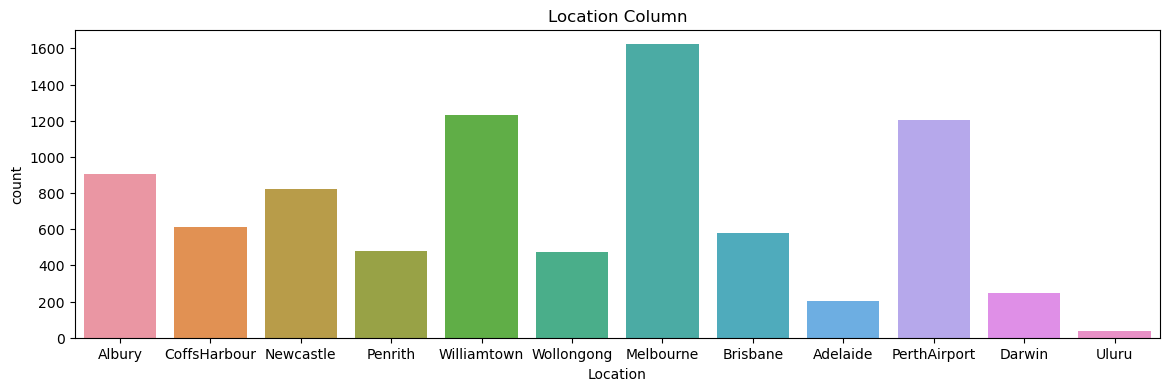

In [31]:
#Univariate analysis
plt.figure(figsize=(14,4))
sns.countplot(x="Location",data=df)
plt.title("Location Column")
plt.show()

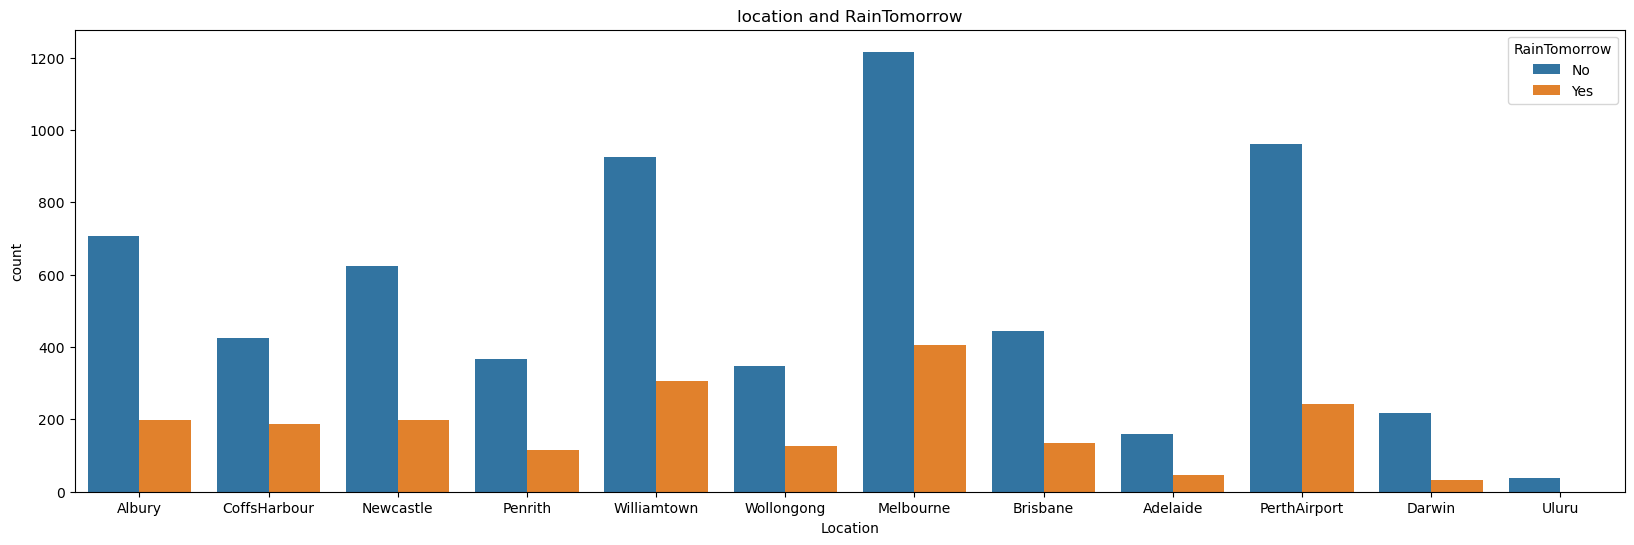

In [32]:
plt.figure(figsize=(20,6))
sns.countplot(x="Location",hue="RainTomorrow",data=df)
plt.title("location and RainTomorrow")
plt.show()

 According to the Location column Melbourne were all the datas collected are high.In most of the cases RainTomorrow are No .

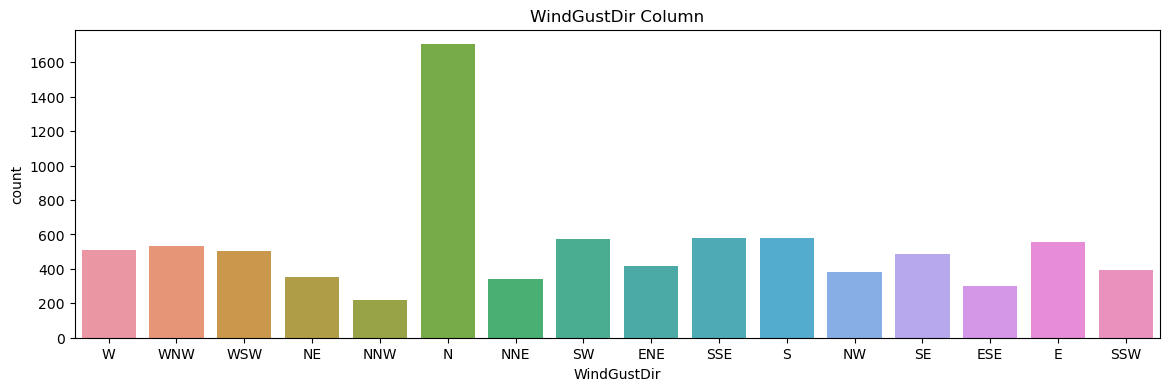

In [33]:
#Univariate analysis
plt.figure(figsize=(14,4))
sns.countplot(x="WindGustDir",data=df)
plt.title("WindGustDir Column")
plt.show()

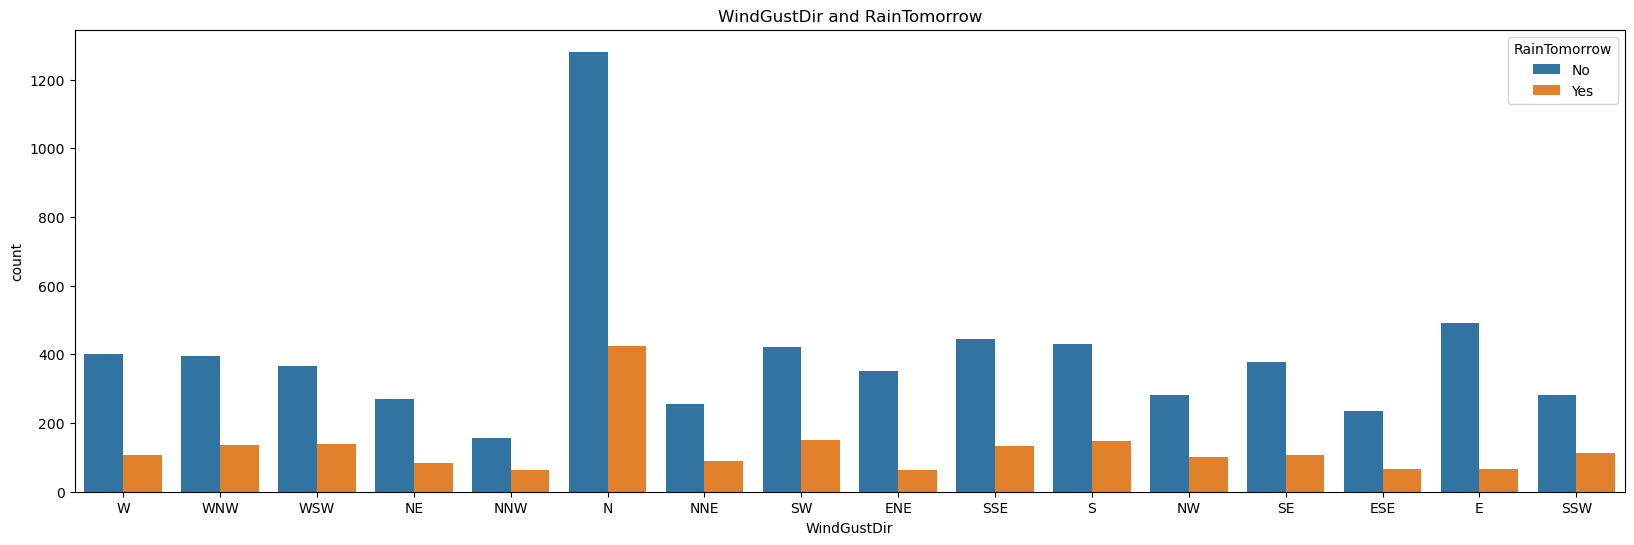

In [34]:
plt.figure(figsize=(20,6))
sns.countplot(x="WindGustDir",hue="RainTomorrow",data=df)
plt.title("WindGustDir and RainTomorrow")
plt.show()

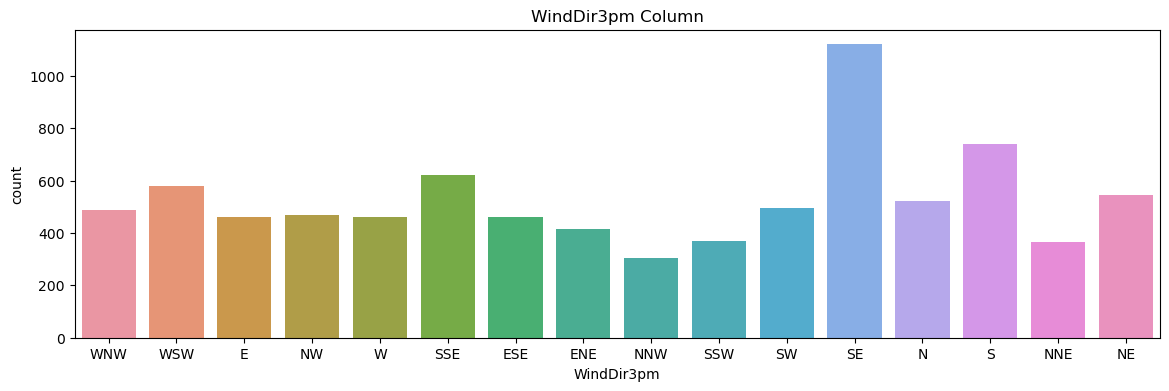

In [35]:
#Univariate analysis
plt.figure(figsize=(14,4))
sns.countplot(x="WindDir3pm",data=df)
plt.title("WindDir3pm Column")
plt.show()

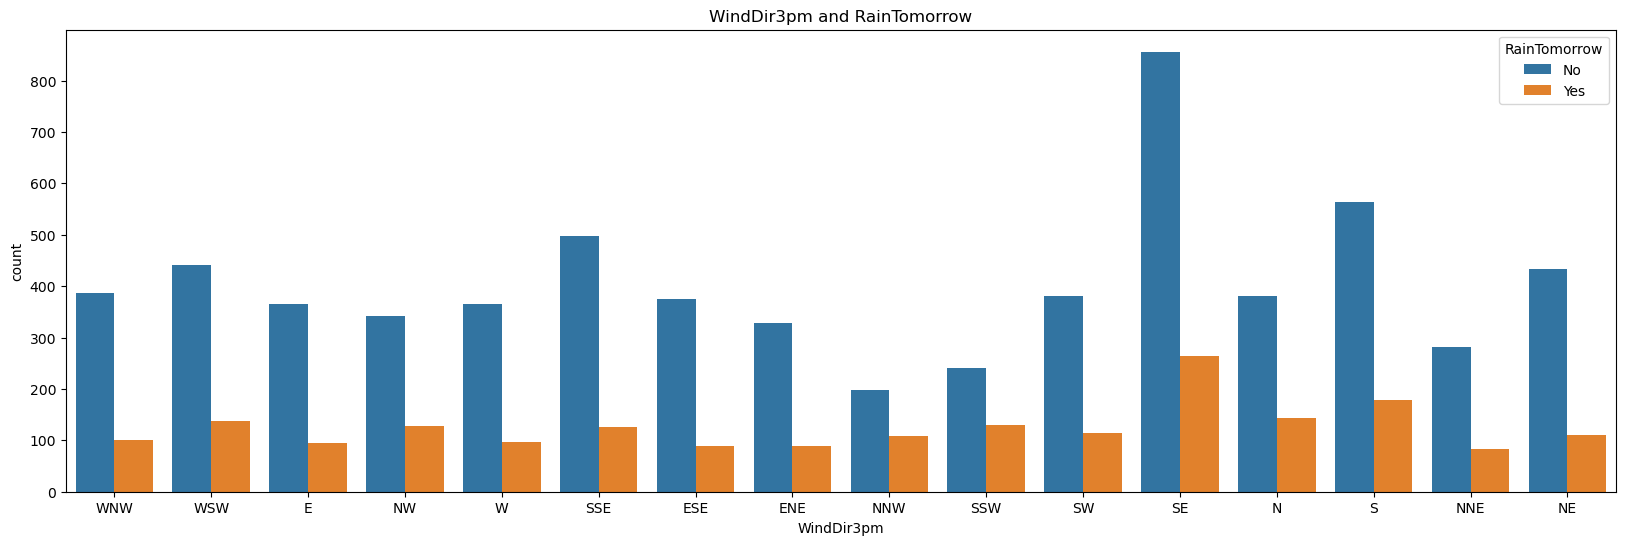

In [36]:
plt.figure(figsize=(20,6))
sns.countplot(x="WindDir3pm",hue="RainTomorrow",data=df)
plt.title("WindDir3pm and RainTomorrow")
plt.show()

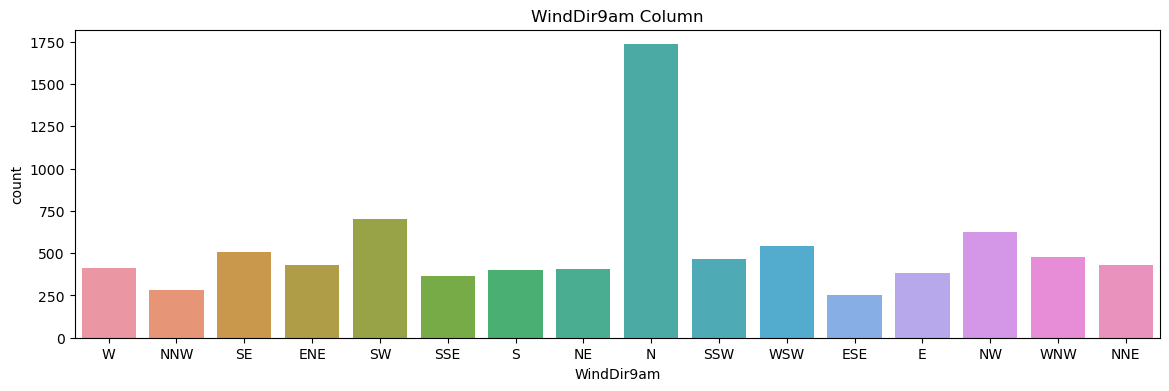

In [37]:
#Univariate analysis
plt.figure(figsize=(14,4))
sns.countplot(x="WindDir9am",data=df)
plt.title("WindDir9am Column")
plt.show()

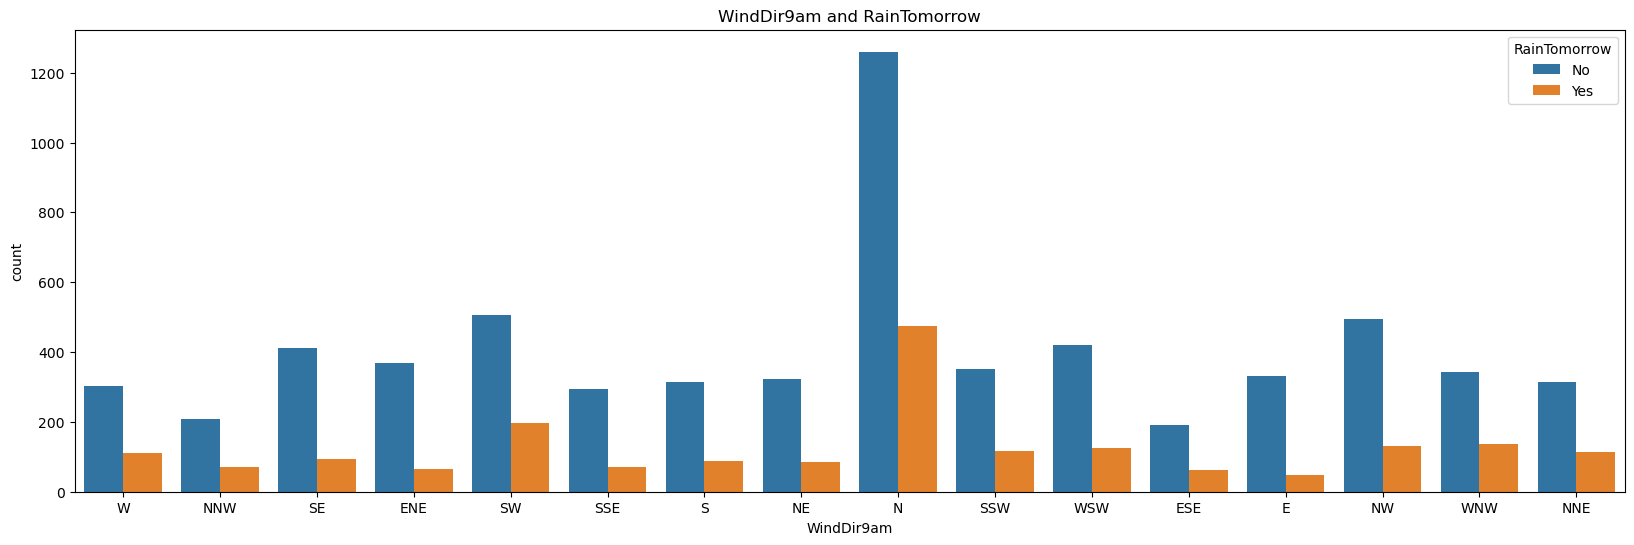

In [38]:
plt.figure(figsize=(20,6))
sns.countplot(x="WindDir9am",hue="RainTomorrow",data=df)
plt.title("WindDir9am and RainTomorrow")
plt.show()

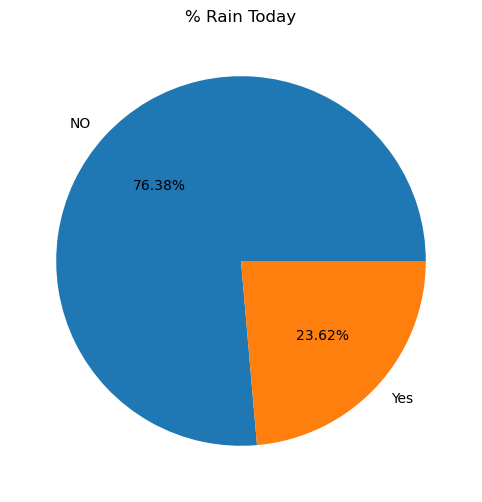

In [39]:
plt.figure(figsize=(10,6))
plt.pie(df['RainToday'].value_counts()*100.0 /len(df),labels=['NO', 'Yes'],autopct='%.2f%%')
plt.title('% Rain Today')
plt.show()

From the piechart above,We can see that for the Raintoday column has majority(76.38%) representing the No while only 23.62% represents No.

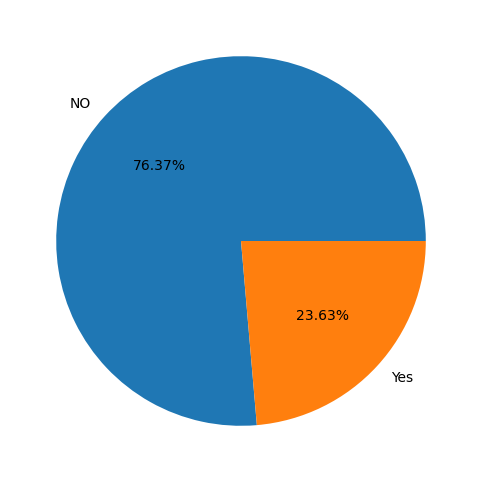

In [40]:
plt.figure(figsize=(10,6))
plt.pie(df['RainTomorrow'].value_counts()*100/len(df),labels=['NO', 'Yes'],autopct='%.2f%%')
plt.show()

From the pie chart we can say than 76.37% record found to be indicating No,While 23.63% of data alone represents that the yes for the raintomorrow column.

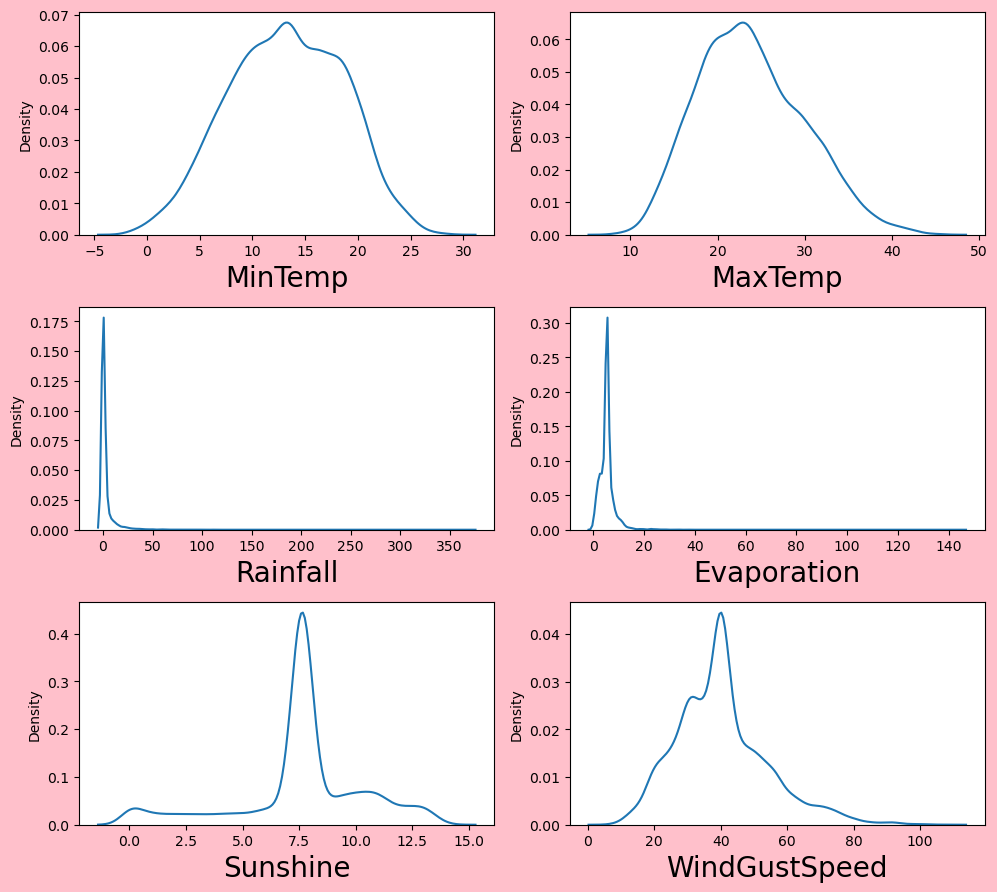

In [41]:
#To see the distribution among the numerical columns: kde plot 
plt.figure(figsize=(10,9),facecolor="pink")
plotnumber=1
for column in num_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.kdeplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From this kde plot we can see the distribution of data 
MinTemp column almost followed symmentrical distribution but there is giant variation in the top.
MaxTemp middle values have some deviated form normal distribution
Rainfall has extremely right skewed data
Evaporation column has some crooked distribution
sunshine and windgustspeed has many slopes in the data.

# Encoding:

In [42]:
cat_col = df.select_dtypes(include=['object']).columns
cat_col

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

These are the columns which has object datatype.

In [43]:
#Replacing the Gender column:
df.replace({
    "RainToday":{"Yes":1,"No":0}},inplace=True)

In [44]:
#Replacing the Gender column:
df.replace({
    "RainTomorrow":{"Yes":1,"No":0}},inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Location']=le.fit_transform(df['Location'])
df['WindGustDir']=le.fit_transform(df['WindGustDir'])
df['WindDir9am']=le.fit_transform(df['WindDir9am'])
df['WindDir3pm']=le.fit_transform(df['WindDir3pm'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

All the columns has numerical dataype.We can further proceed to the analysis.

# Corelation:

In [47]:
a=df.corr()

In [48]:
a.sort_values(by='RainTomorrow', ascending=False)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
RainTomorrow,0.002824,0.092942,-0.152886,0.220021,-0.059012,-0.327731,0.051832,0.190127,0.032860,0.008918,...,-0.135242,0.278943,0.344369,-0.023211,-0.193805,0.312929,1.000000,-0.015461,-0.001243,-0.011066
Humidity3pm,0.055790,0.079048,-0.421879,0.235444,-0.161661,-0.440268,0.053567,-0.091860,0.124556,-0.012167,...,0.070369,0.424348,0.439965,-0.130414,-0.491485,0.359219,0.444808,0.012512,-0.074256,-0.028920
Cloud3pm,0.017561,0.038414,-0.250132,0.150760,-0.108022,-0.547304,0.092979,0.078631,0.062947,0.053986,...,-0.028748,0.574943,1.000000,-0.125926,-0.291707,0.245373,0.344369,0.000664,0.002344,-0.010801
RainToday,0.003071,0.064789,-0.224883,0.461106,-0.088654,-0.234230,0.125188,0.076822,0.157324,0.100125,...,-0.034000,0.283463,0.245373,-0.097332,-0.234693,1.000000,0.312929,-0.015281,-0.000801,-0.011282
Cloud9am,0.038019,0.091604,-0.253968,0.185444,-0.062283,-0.533391,0.123883,0.023313,0.099582,0.075453,...,-0.012409,1.000000,0.574943,-0.135486,-0.268824,0.283463,0.278943,-0.008100,-0.012628,0.006788
Humidity9am,0.005662,-0.130731,-0.390976,0.228800,-0.213108,-0.360831,0.036467,-0.269593,0.025604,-0.010312,...,0.173415,0.404742,0.296862,-0.378344,-0.382401,0.374007,0.271222,0.003799,-0.115530,0.099717
Rainfall,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.086000,0.093821,0.038560,...,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021,-0.013760,-0.012244,0.006435
WindGustSpeed,0.231396,0.230058,0.139998,0.086000,0.136371,-0.013778,0.016591,1.000000,-0.072058,0.071235,...,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127,-0.002876,0.051968,-0.042402
MinTemp,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,-0.147166,...,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.009446,-0.245854,0.044123
WindSpeed9am,0.221378,0.136872,0.013314,0.050631,0.104294,-0.018069,0.025399,0.600198,0.054272,0.025973,...,-0.138454,-0.000549,0.058198,0.109798,-0.002606,0.035531,0.068285,-0.003067,0.038427,-0.088489


<Axes: >

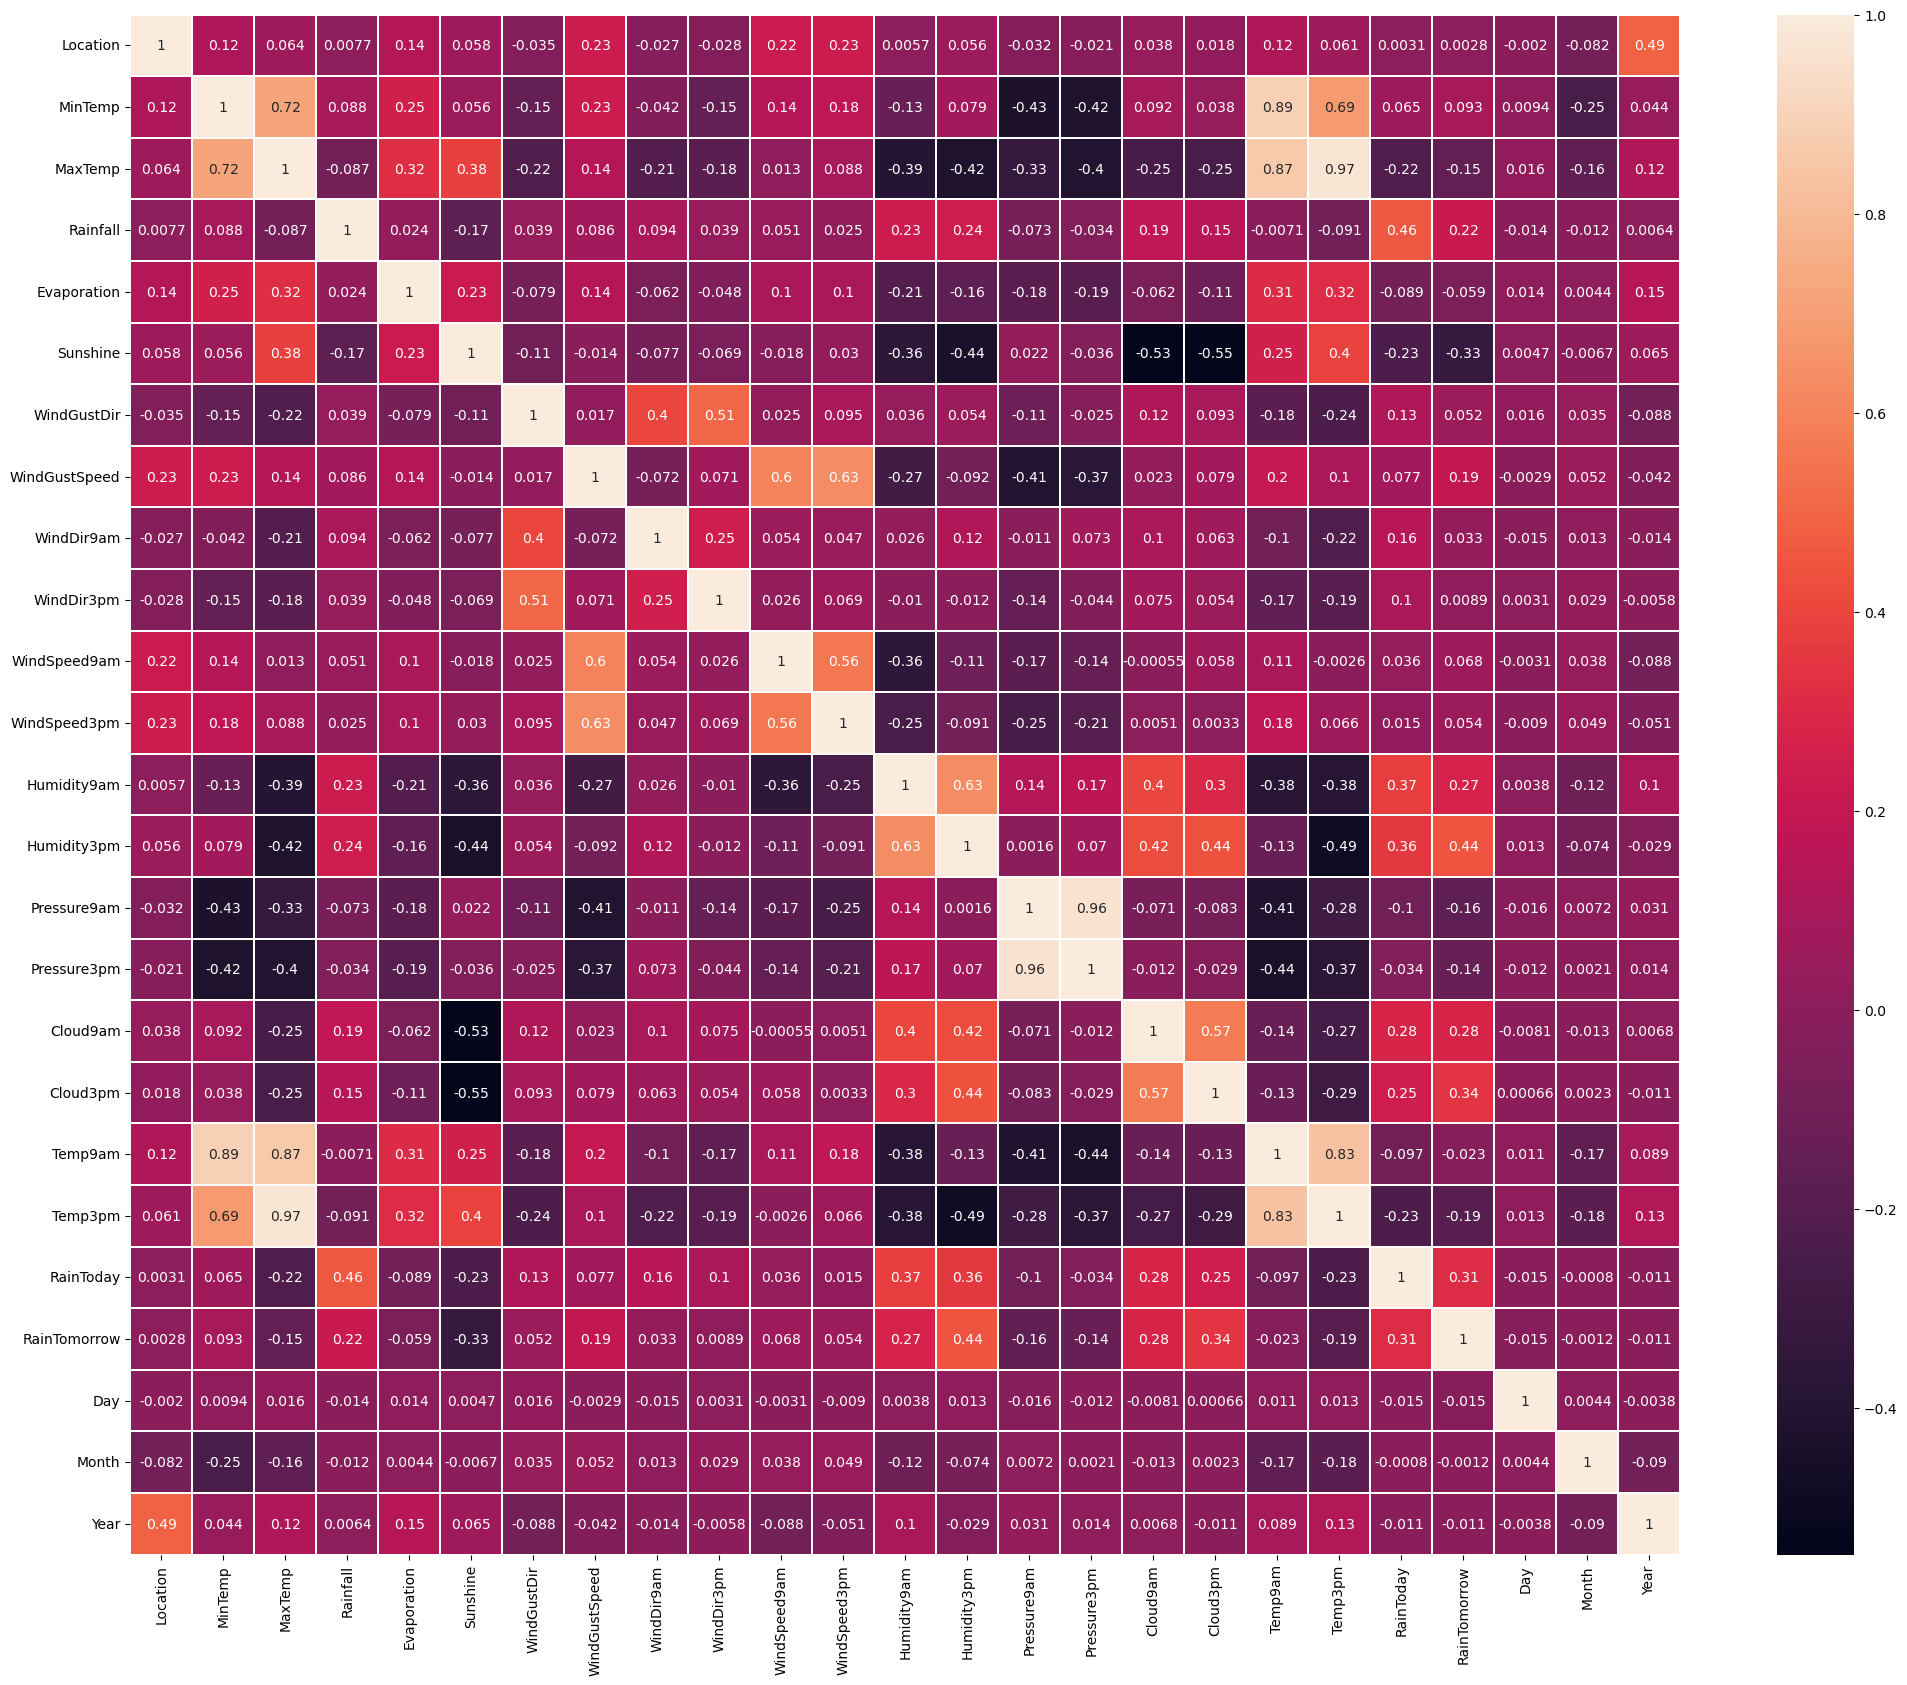

In [49]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=.25)

1]Dependent feature: RainTomorrow
    
From this heat map We can see how the dependent feature corelation with other columns:

Postive Corelation:Rainfall(22%),WindGustSpeed	(19%),RainToday	(31%),Cloud9am(27%%),Cloud3pm(34%)

Negative Corelation:MaxTemp(15%)

Zero Corelation:Location,MinTemp,Evaporation,WindDir9am	WindDir3pm,Pressure3pm
    

 2]Dependent Feature:Rainfall
 
 From this heat mao we can see how the dependent feature corelation with other columns:
 
 Postive Corelation:RainTomorrow(22%),RainToday(45%),Cloud3pm(15%),Cloud9am(19%),Humidity9am(23%),Humidity 3am(24%)
 
 Negative Corelation:Month,Day,MaxTemp
 
 Zero Corelation:Year,temp9am,temp3am,Location,mintemp

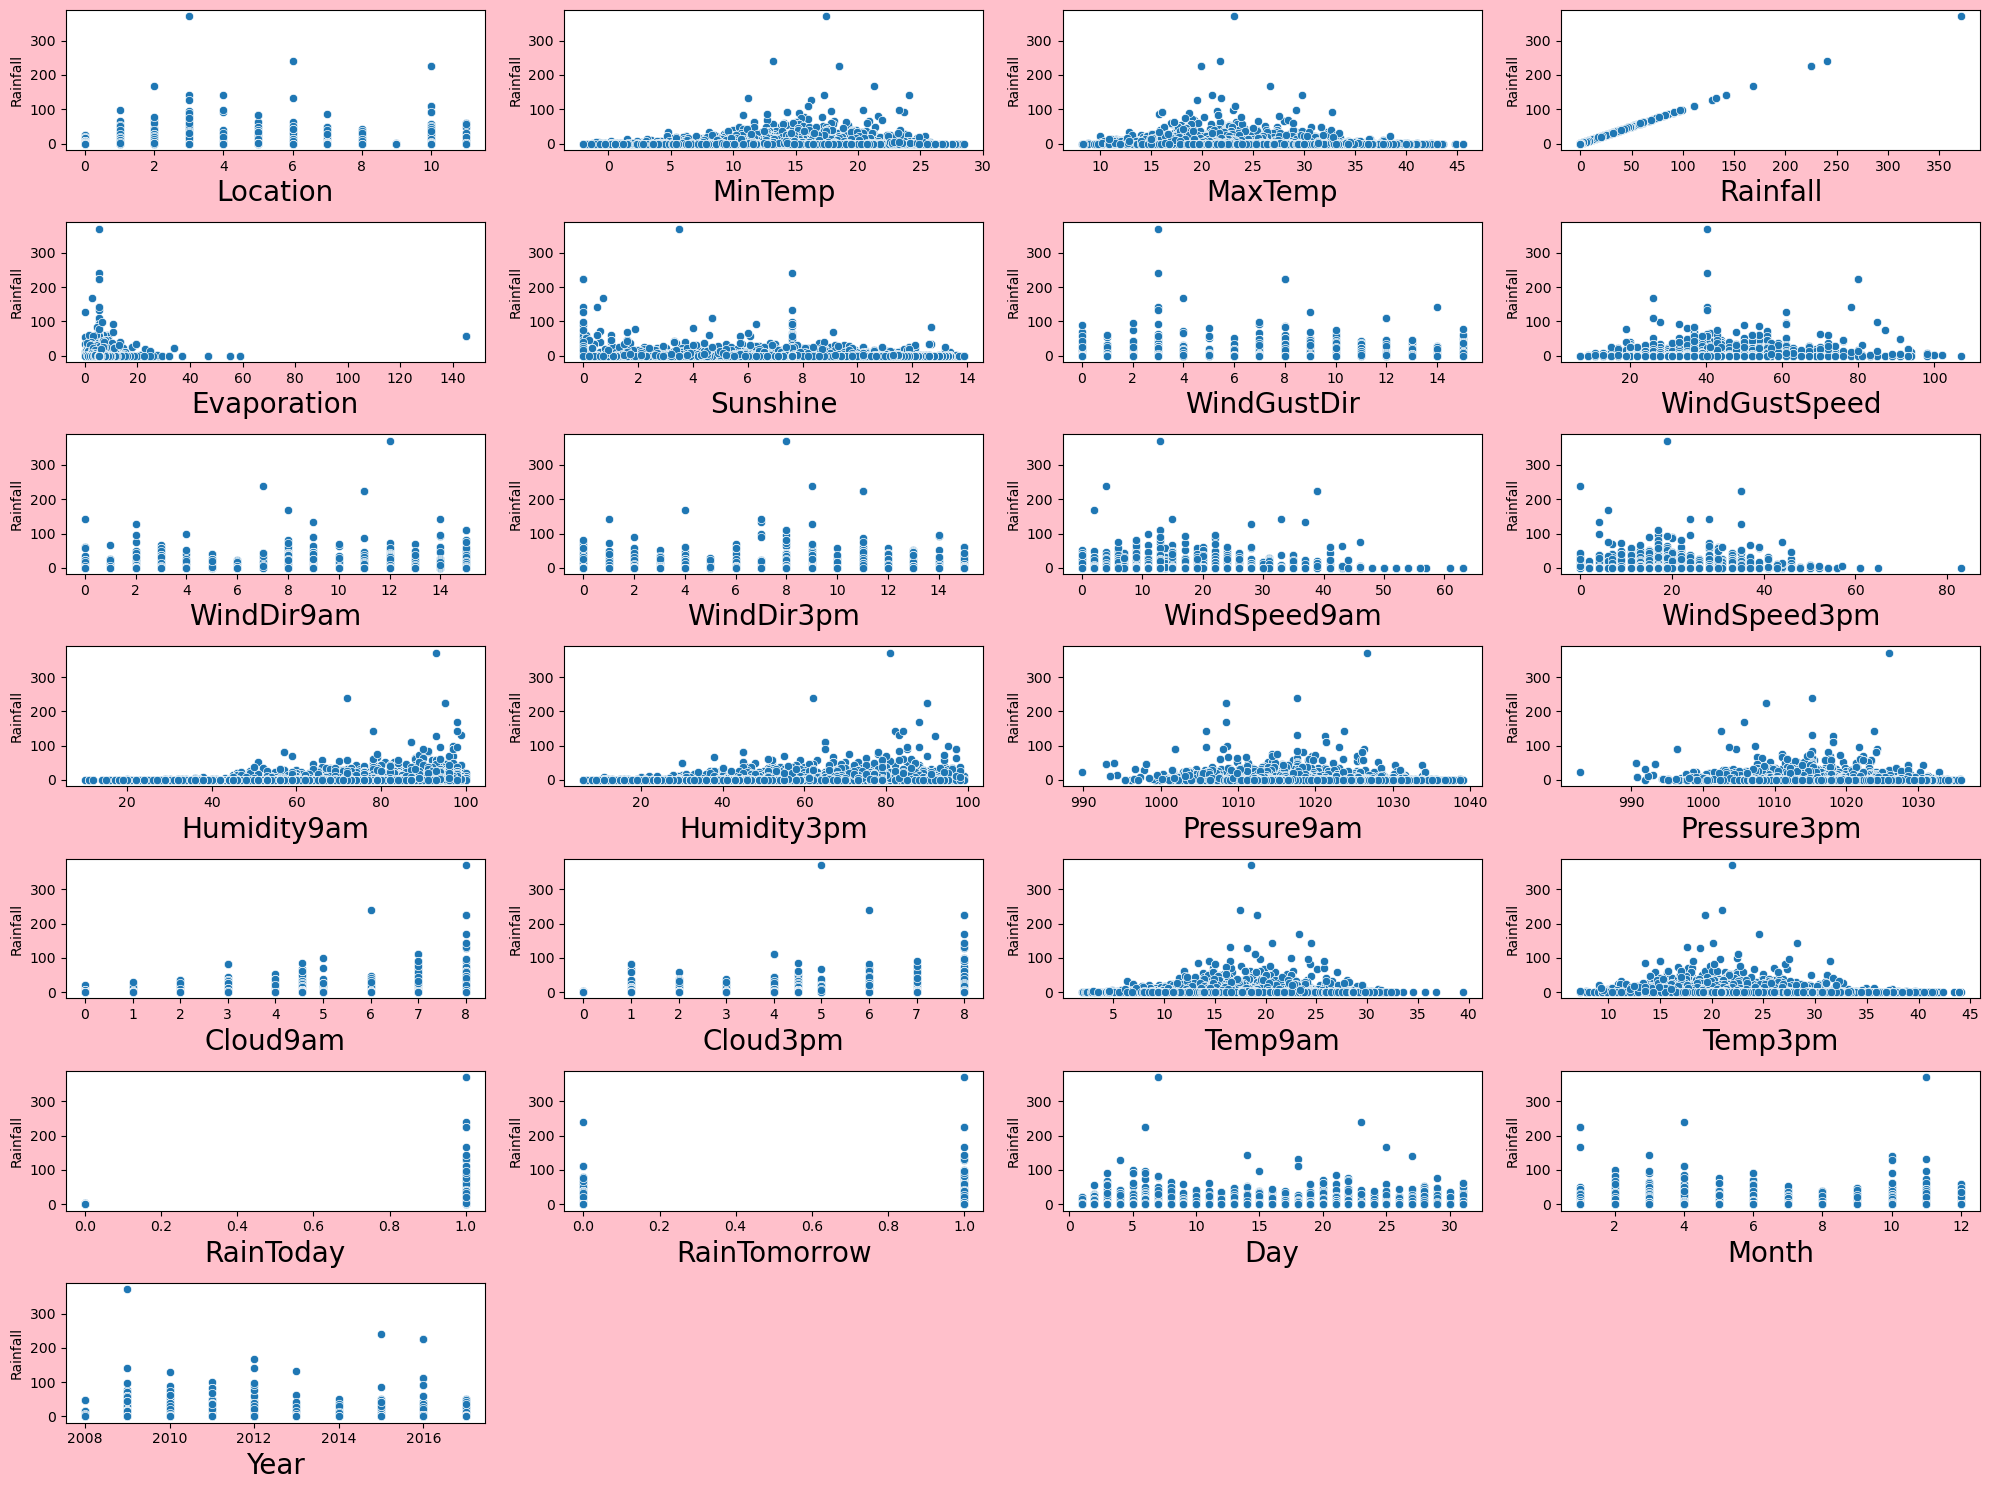

In [50]:
#To see the co-relation among the columns with respect to region:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.scatterplot(x=column,y="Rainfall",data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Skewness handling:

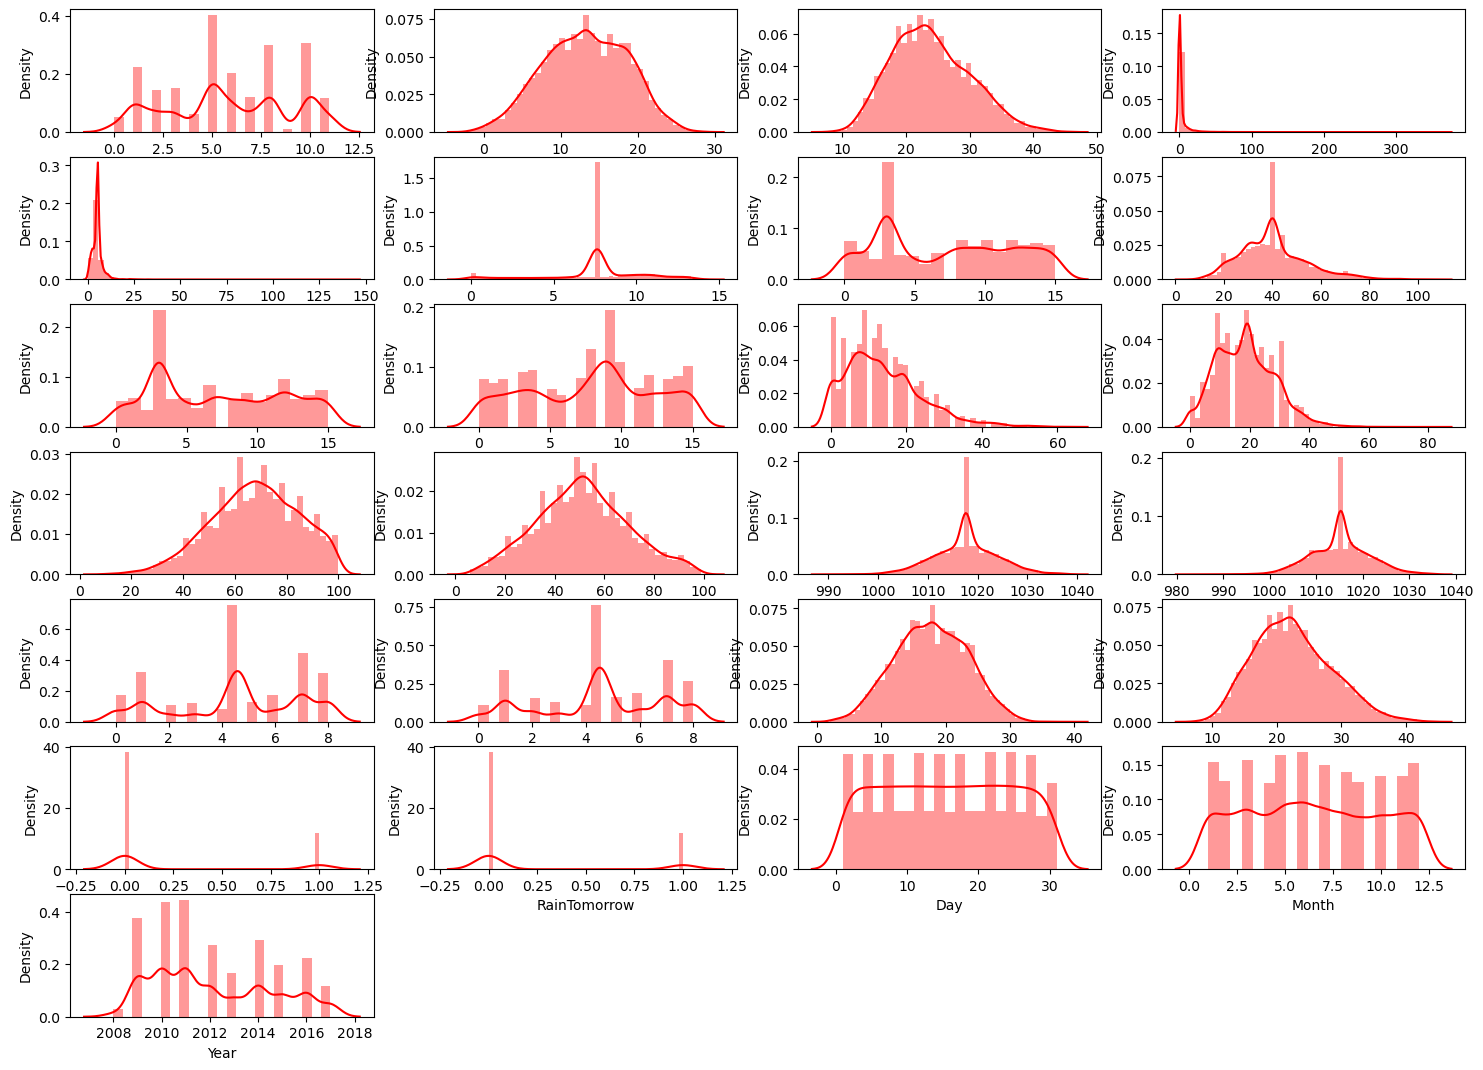

In [51]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [52]:
Y=df[["RainTomorrow"]]
df.drop("RainTomorrow",axis=1,inplace=True)

In [53]:
Y1=df[["Rainfall"]]

In [54]:
df.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
Day               0.004260
Month             0.039388
Year              0.418663
dtype: float64

skewness more than+/- 0.5 will we treated

In [55]:
#Removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [56]:
df.skew()

Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         0.904387
Evaporation      0.080305
Sunshine        -0.075544
WindGustDir      0.119640
WindGustSpeed    0.010481
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am    -0.079333
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
Day              0.004260
Month            0.039388
Year             0.418663
dtype: float64

Almost most of theskeweness has been removed with the help of powerTransform.

# Outliers:

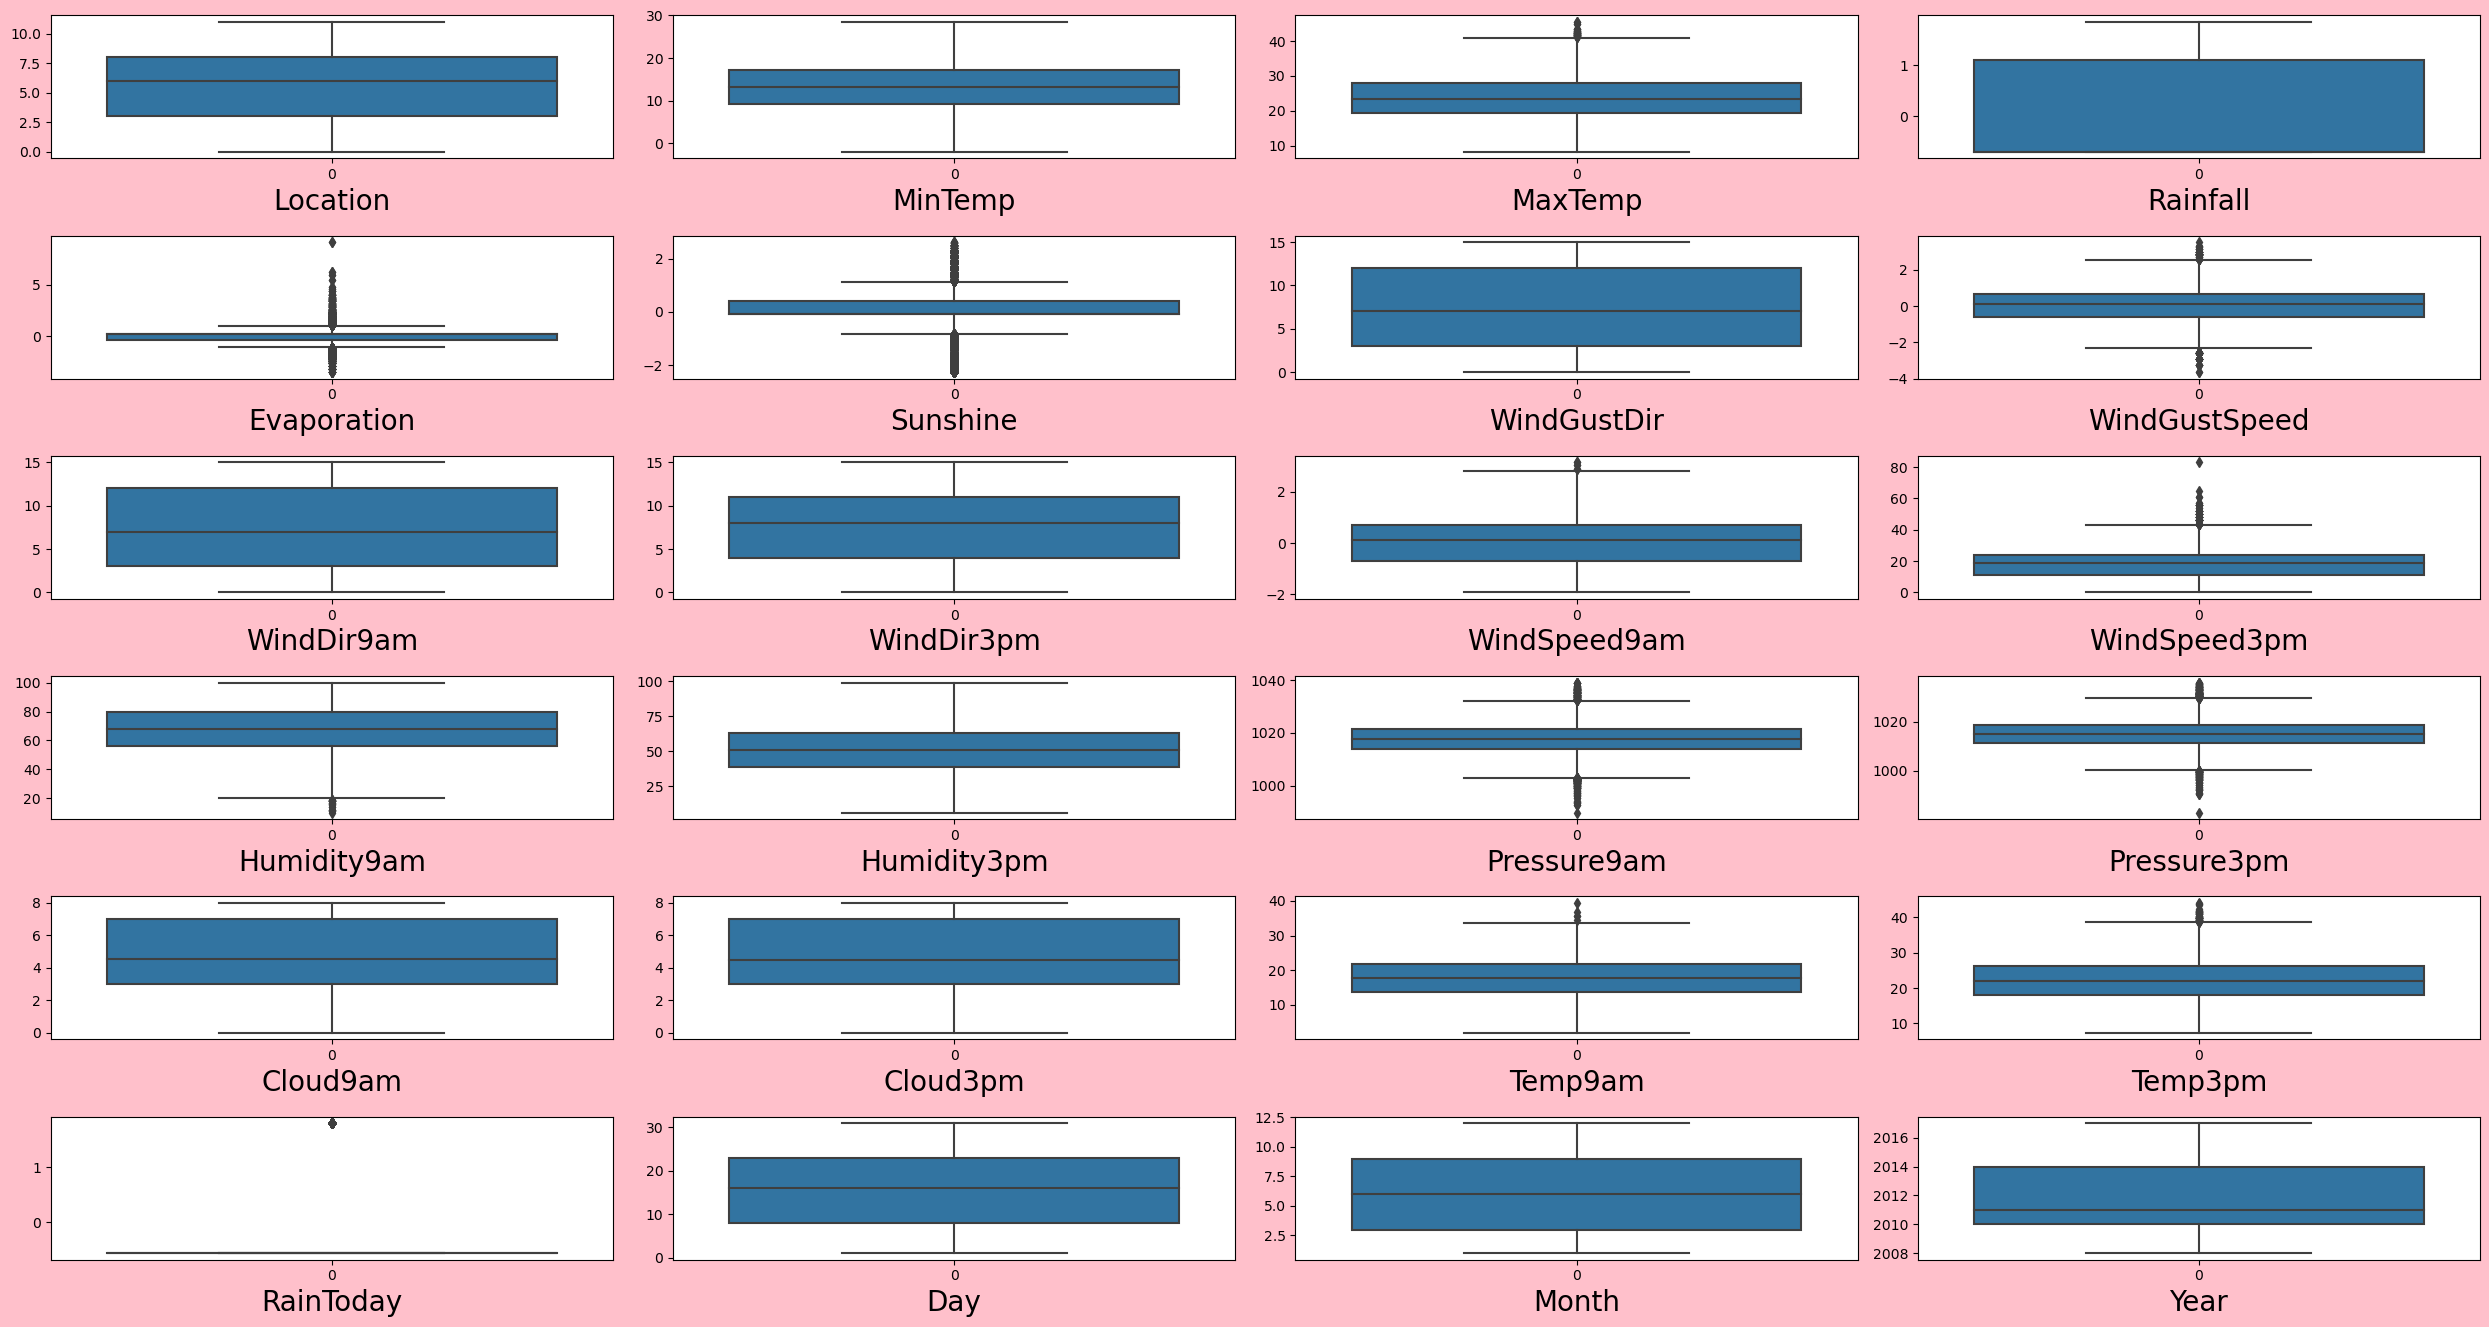

In [57]:
#To see the outliers among the columns:
plt.figure(figsize=(25,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# outliers removal

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   67,   68,   68,  123,  296,  381,  381,  405,  406,  407,
        407,  563,  568,  568,  569,  602,  683,  683,  748,  748, 1008,
       1189, 1387, 1413, 1467, 1480, 1587, 1644, 1665, 1898, 2028, 2043,
       2219, 2230, 2346, 2373, 2389, 2527, 2527, 2710, 2738, 2743, 2744,
       2768, 2835, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2891, 2897,
       2905, 2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989,
       3051, 3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099, 3101, 3139,
       3141, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3206, 3212, 3212,
       3213, 3221, 3227, 3248, 3260, 3271, 3278, 3278, 3291, 3291, 3302,
       3302, 3303, 3449, 3449, 3450, 3458, 3471, 3617, 3687, 3701, 3707,
       3711, 3715, 3721, 3729, 3735, 3743, 3749, 3757, 3763, 3771, 3785,
       3791, 3799, 3805, 3813, 3819, 3827, 3841, 3903, 3910, 3911, 3911,
       3912, 3919, 3934, 3950, 3951, 3953, 3991, 3

In [59]:
z_scoredf=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",z_scoredf.shape)

with outliers:: (8425, 24)
After removing outliers:: (8142, 24)


# IQR

In [60]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

24.858577430257593

In [61]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQRdf= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(IQRdf.shape)

(8404, 24)


Choosing the zscore for the outlier removal.


In [62]:
z_scoredf=df

# Checking for the Imbalanced dataset in dependent feature:

In [63]:
Y.value_counts()

RainTomorrow
0               6434
1               1991
dtype: int64

There is imbalanced dataset in dependent feature.

In [64]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

# Splitting The Dataset Into Feature and Target:

In [65]:
#Importing the neccessary libraries and model for further creation of the model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score

In [66]:
X=df

In [67]:
X.shape , Y.shape

((8425, 24), (8425, 1))

In [68]:
X,Y=sm.fit_resample(X,Y)

In [69]:
X.shape , Y.shape

((12868, 24), (12868, 1))

In [70]:
Y.value_counts()

RainTomorrow
0               6434
1               6434
dtype: int64

Now the dataset looks more balanced.

# Standardisation:

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [72]:
x_scaled=scaler.fit_transform(X)

In [73]:
# best Random_state
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x_scaled,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8053613053613053 on Random State = 157


In [74]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,Y,random_state=maxRS,test_size=.20)

# Model selection:

In [75]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFC_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFC_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [76]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 80.53613053613053
Confusion Matrix of  LogisticRegression()  is 
 [[1047  252]
 [ 249 1026]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1299
           1       0.80      0.80      0.80      1275

    accuracy                           0.81      2574
   macro avg       0.81      0.81      0.81      2574
weighted avg       0.81      0.81      0.81      2574

**************************************************
Accuracy_Score of  RidgeClassifier() is 80.22533022533023
Confusion Matrix of  RidgeClassifier()  is 
 [[1060  239]
 [ 270 1005]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1299
           1       0.81      0.79      0.80      1275

    accuracy                           0.80      2574
   macro avg       0.80      0.80      0.80      2574
weighted avg       0.80      0.80      0.80      2574

*****************************

# Cross Validation:

In [77]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 80.53613053613053
cross Validation accuracy score of  LogisticRegression()  is  72.1021328716626
**************************************************
Accuracy_Score of  RidgeClassifier() is 80.22533022533023
cross Validation accuracy score of  RidgeClassifier()  is  72.46762521927698
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 88.42268842268842
cross Validation accuracy score of  DecisionTreeClassifier()  is  74.36309641906223
**************************************************
Accuracy_Score of  SVC() is 88.07303807303806
cross Validation accuracy score of  SVC()  is  72.15662258025259
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 87.45143745143746
cross Validation accuracy score of  KNeighborsClassifier()  is  nan
**************************************************
Accuracy_Score of  RandomForestClassifier() is 93.9005439005439
cross Validatio

# Accuracy_Score of  RandomForestClassifier() is 93.93939393939394

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1128,  171],
       [ 171, 1104]], dtype=int64)

<Axes: >

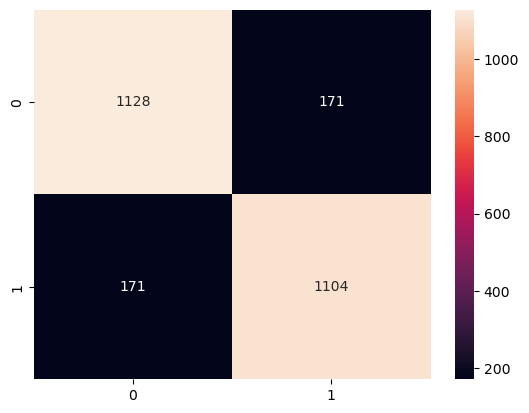

In [79]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1299
           1       0.87      0.87      0.87      1275

    accuracy                           0.87      2574
   macro avg       0.87      0.87      0.87      2574
weighted avg       0.87      0.87      0.87      2574



In [81]:
from sklearn.metrics import RocCurveDisplay

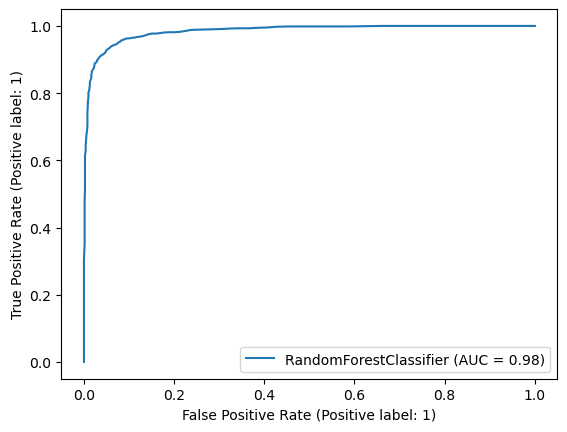

In [82]:
RocCurveDisplay.from_estimator(RFC_model, x_test, y_test)

Finalised selected for Dependent Feature:RainTomorrow is RandomForest classifer

# Saving the Model:

In [83]:
Saving the Model:import joblib
joblib.dump(RFC_model,"RainTomorrow Prediction.pkl")

['RainTomorrow Prediction.pkl']

# Splitting The Dataset Into Feature and Target:

# Dependent Feature : Rainfall

In [84]:
Y1.head(5)

,Rainfall
0,0.6
1,0.0
2,0.0
3,0.0
4,1.0


In [85]:
X=df.drop(["Rainfall"],axis=1)

In [86]:
X.shape,Y1.shape

((8425, 23), (8425, 1))

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaled=scaler.fit_transform(X)
VIF= pd.DataFrame()
VIF['features']=X.columns
VIF['vif']= [variance_inflation_factor(x_scaled,i) for i in range(len(X.columns))]
VIF

,features,vif
0,Location,1.586665
1,MinTemp,9.379716
2,MaxTemp,25.079493
3,Evaporation,6.004423
4,Sunshine,1.490752
5,WindGustDir,1.996292
6,WindGustSpeed,1.573497
7,WindDir9am,2.360130
8,WindDir3pm,1.408229
9,WindSpeed9am,1.490204


In [89]:
df.drop(['Temp3pm','Temp9am','Pressure9am','MaxTemp'],axis=1,inplace=True)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaled=scaler.fit_transform(X)
VIF= pd.DataFrame()
VIF['features']=X.columns
VIF['vif']= [variance_inflation_factor(x_scaled,i) for i in range(len(X.columns))]
VIF

,features,vif
0,Location,1.586665
1,MinTemp,9.379716
2,MaxTemp,25.079493
3,Evaporation,6.004423
4,Sunshine,1.490752
5,WindGustDir,1.996292
6,WindGustSpeed,1.573497
7,WindDir9am,2.360130
8,WindDir3pm,1.408229
9,WindSpeed9am,1.490204


In [91]:
X=df

In [92]:
df.skew()

Location        -0.050456
MinTemp         -0.089989
Rainfall         0.904387
Evaporation      0.080305
Sunshine        -0.075544
WindGustDir      0.119640
WindGustSpeed    0.010481
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am    -0.079333
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
RainToday        1.242362
Day              0.004260
Month            0.039388
Year             0.418663
dtype: float64

In [93]:
for i in X:
    IQR= X[i].quantile(.75)-X[i].quantile(.25)
    lower=X[i].quantile(.25) - (1.5 * IQR)
    upper=X[i].quantile(.75) + (1.5 * IQR)
    X[i]=np.where(X[i]<lower,lower,X[i])
    X[i]=np.where(X[i]>upper,upper,X[i])

# Standardisation:

In [94]:
x_scaled=scaler.fit_transform(X)

In [95]:
# Its a Regression problem coz output variable have continuous data, sales prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [96]:
for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x_scaled,Y1,random_state=i,test_size=.2)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    acc=r2_score(y_test,test_pred)
    acc

In [97]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,Y1,random_state=maxRS,test_size=.2)

In [98]:
LR.fit(x_train,y_train)
train_pred=LR.predict(x_train)
test_pred=LR.predict(x_test)
acc=r2_score(y_test,test_pred)
acc

0.31349131389728835

# Model Selection:

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [101]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,Y1,random_state=104,test_size=.2)

In [102]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('\n\n')

mean_absolute_error of  LinearRegression() model 3.036749019325026
mean_square_error of LinearRegression() model 53.89273123558967
R2 Score of LinearRegression() model 25.56596207638805



mean_absolute_error of  Ridge() model 3.0364692753781504
mean_square_error of Ridge() model 53.8916792133115
R2 Score of Ridge() model 25.567415078756916



mean_absolute_error of  Lasso() model 2.2123361000543835
mean_square_error of Lasso() model 53.42274266069587
R2 Score of Lasso() model 26.21508760046629



mean_absolute_error of  DecisionTreeRegressor() model 0.08534124629080146
mean_square_error of DecisionTreeRegressor() model 10.18972106824926
R2 Score of DecisionTreeRegressor() model 85.92644931819265



mean_absolute_error of  SVR() model 1.6030513925738545
mean_square_error of SVR() model 56.251211974386386
R2 Score of SVR() model 22.30854237007759



mean_absolute_error of  KNeighborsRegressor() model 2.054888874306876
mean_square_error of KNeighborsRegressor() model 61.504480258609945
R

# Cross Validation

In [103]:
from sklearn.model_selection import cross_val_score
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,x_scaled,Y1,cv=10).mean())
    print("\n\n")

mean_square of  LinearRegression() model 53.89273123558967
cross Validation score of  LinearRegression()  is  0.26340465413942626



mean_square of  Ridge() model 53.8916792133115
cross Validation score of  Ridge()  is  0.2634195414069172



mean_square of  Lasso() model 53.42274266069587
cross Validation score of  Lasso()  is  0.2727265006577694



mean_square of  DecisionTreeRegressor() model 10.18972106824926
cross Validation score of  DecisionTreeRegressor()  is  0.9667035810345483



mean_square of  SVR() model 56.251211974386386
cross Validation score of  SVR()  is  0.23147916824683296



mean_square of  KNeighborsRegressor() model 61.504480258609945
cross Validation score of  KNeighborsRegressor()  is  0.2814315720718798



mean_square of  RandomForestRegressor() model 0.04059941424332402
cross Validation score of  RandomForestRegressor()  is  0.9884184959506808



mean_square of  ElasticNet() model 54.70811803535528
cross Validation score of  ElasticNet()  is  0.252099957872174

# Decision Tree Regressor:

R2 Score of DecisionTreeRegressor() model 85.92644931819265

mean_square of  DecisionTreeRegressor() model 10.18972106824926

cross Validation score of  DecisionTreeRegressor()  is  0.9667035810345483

# Saving the Model:

In [104]:
import joblib
joblib.dump(DT_model,"RainfallPrediction.pkl")


['RainfallPrediction.pkl']

In [ ]:
#End of the project